<a target="_blank" href="https://colab.research.google.com/github/Techtonique/tisthemachinelearner/blob/main/examples/2025_06_23_custom_nnetsauce_gradient_descent.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 0 - Install

In [ ]:
!pip install nnetsauce tisthemachinelearner

# 1 - Benchmark

A good out-of-sample RMSE on this data set is $\sqrt(10) \sim 3.16$

In [ ]:
import numpy as np
import pandas as pd

from functools import partial
from sklearn.utils.discovery import all_estimators
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from tisthemachinelearner import FiniteDiffRegressor


# Data set
df = pd.read_csv("https://raw.githubusercontent.com/Techtonique/datasets/refs/heads/main/tabular/regression/boston_dataset2.csv")
assert 'training_index' in df.columns, \
"must have a column 'training_index' specifying which sample belongs to the training set"
X_train = df[df['training_index'] == 1].drop(columns=['target', 'training_index'],
                axis=1)
y_train = df[df['training_index'] == 1]['target'].values
X_test = df[df['training_index'] == 0].drop(columns=['target', 'training_index'],
                axis=1)
y_test = df[df['training_index'] == 0]['target'].values


results = []

lrs = [1e-4, 1e-3, 1e-2, 1e-1]
optimizers = ["gd", "sgd", "adam", "cd"]

for estimator in tqdm([("GBDTRegressor", "xgboost"), ("GBDTRegressor", "lightgbm"), ("GBDTRegressor", "catboost")] + all_estimators(type_filter='regressor')):
  for lr in lrs:
    for opt in optimizers:
        if estimator[0] == "GBDTRegressor":
          #try:
          regr = FiniteDiffRegressor(estimator[0], model_type=estimator[1], lr=lr, optimizer=opt)
          regr.fit(X_train, y_train, verbose=False, show_progress=False)
          y_pred = regr.predict(X_test)
          rmse = np.sqrt(np.mean((y_test - y_pred)**2))
          print(f"{estimator[1]}: lr = {lr}, opt = {opt}, RMSE = {rmse}")
          results.append([estimator[1], lr, opt, rmse])
          #except Exception as e:
          #  continue
        else:
          try:
            regr = FiniteDiffRegressor(estimator[0], lr=lr, optimizer=opt)
            regr.fit(X_train, y_train, verbose=False, show_progress=False)
            y_pred = regr.predict(X_test)
            rmse = np.sqrt(np.mean((y_test - y_pred)**2))
            print(f"{estimator[0]}: lr = {lr}, opt = {opt}, RMSE = {rmse}")
            results.append([estimator[0], lr, opt, rmse])
          except Exception as e:
            continue

In [ ]:
import pandas as pd

df_results = pd.DataFrame(results, columns=["model", "lr", "opt", "rmse"]).sort_values("rmse")

In [16]:
display(df_results.iloc[:50,:])

,model,lr,opt,rmse
221,GradientBoostingRegressor,0.10,sgd,2.75
222,GradientBoostingRegressor,0.10,adam,2.77
216,GradientBoostingRegressor,0.01,gd,2.77
213,GradientBoostingRegressor,0.00,sgd,2.77
212,GradientBoostingRegressor,0.00,gd,2.77
210,GradientBoostingRegressor,0.00,adam,2.77
211,GradientBoostingRegressor,0.00,cd,2.77
208,GradientBoostingRegressor,0.00,gd,2.77
214,GradientBoostingRegressor,0.00,adam,2.77
215,GradientBoostingRegressor,0.00,cd,2.77


# 2 - Illustration

In [21]:
regr = FiniteDiffRegressor("GradientBoostingRegressor", lr=0.1, optimizer="sgd")
regr.fit(X_train, y_train, verbose=False, show_progress=True)


100%|██████████| 10/10 [00:05<00:00,  1.72it/s]


FiniteDiffRegressor(base_model='GradientBoostingRegressor', lr=0.1,
                    optimizer='sgd')

In [24]:
y_pred = regr.predict(X_test)

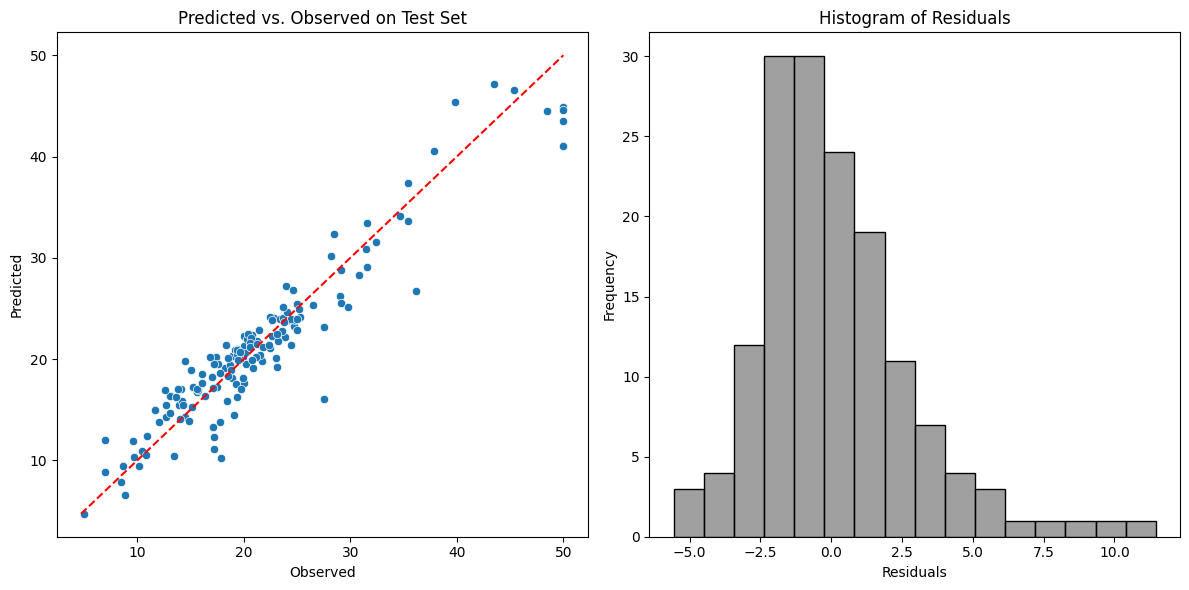

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot
sns.scatterplot(x=y_test, y=y_pred, ax=axes[0])
axes[0].plot([min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())],
             [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())],
             color='red', linestyle='--')
axes[0].set_xlabel("Observed")
axes[0].set_ylabel("Predicted")
axes[0].set_title("Predicted vs. Observed on Test Set")

# Histogram of residuals
sns.histplot(residuals, ax=axes[1], color='gray')
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals")

plt.tight_layout()
plt.show()
